In [132]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns

In [133]:
df = pd.read_csv(r"C:\Users\dell\Desktop\access2019\Sample - Superstore.csv" , encoding="Latin-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# data exploration #

In [134]:
df.shape

(9994, 21)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [136]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# data cleaning #

In [137]:
#  drop useless columns
df = df.drop(columns=['Postal Code'])
df = df.drop(columns=['Product ID'])
df = df.drop(columns=['Row ID'])


### transformation of data type to the right type ###

In [138]:
#  Order Date to the right date time 
# ship date same thing
df['Order Date']= pd.to_datetime(df['Order Date'])

df['Ship Date']= pd.to_datetime(df['Ship Date'])


### other cleaning ###

In [139]:
# supression des espaces column
df.columns = df.columns.str.strip()


In [140]:
# verifier les lignes doublant
df[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,East,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [141]:
df = df.drop(index=3406)



In [142]:
# verifier les nan
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### detection outliers ###


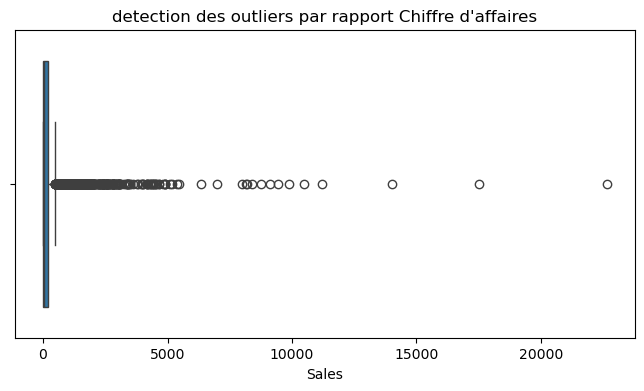

In [143]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Sales'])
plt.title("detection des outliers par rapport Chiffre d'affaires")
plt.xlabel("Sales")
plt.show()

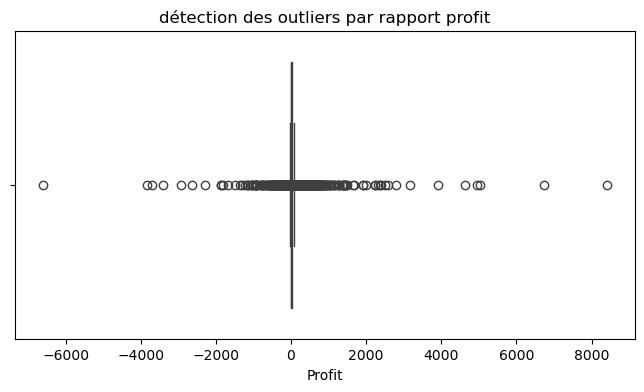

In [144]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Profit'])
plt.title("détection des outliers par rapport profit")
plt.xlabel("Profit")
plt.show()


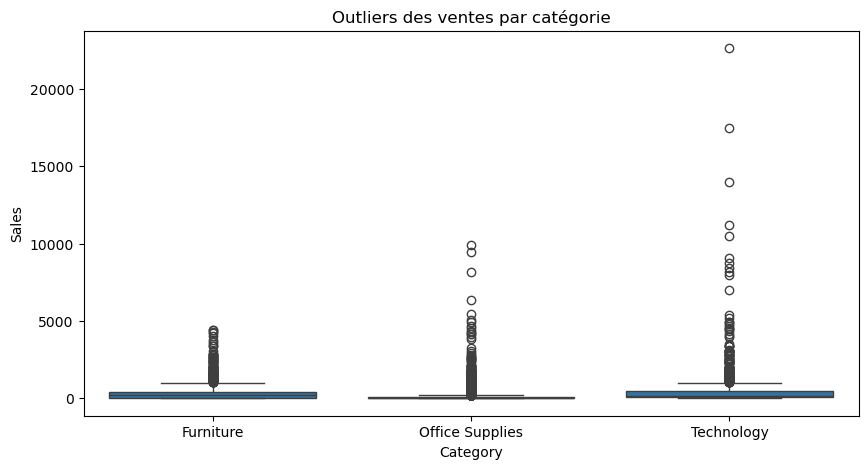

In [145]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title("Outliers des ventes par catégorie")
plt.show()


In [148]:
df.to_csv(
    r"C:\Users\dell\Desktop\access2019\Sample - Superstore_CLEAN.csv",
    index=False
)


# Analyse des ventes #

### Chiffre d’affaires total ###

In [149]:
total_sales = df['Sales'].sum()
print("chiffre d'affaire total :", total_sales)


chiffre d'affaire total : 2296919.4883000003


### Évolution du chiffre d’affaires dans le temps ###

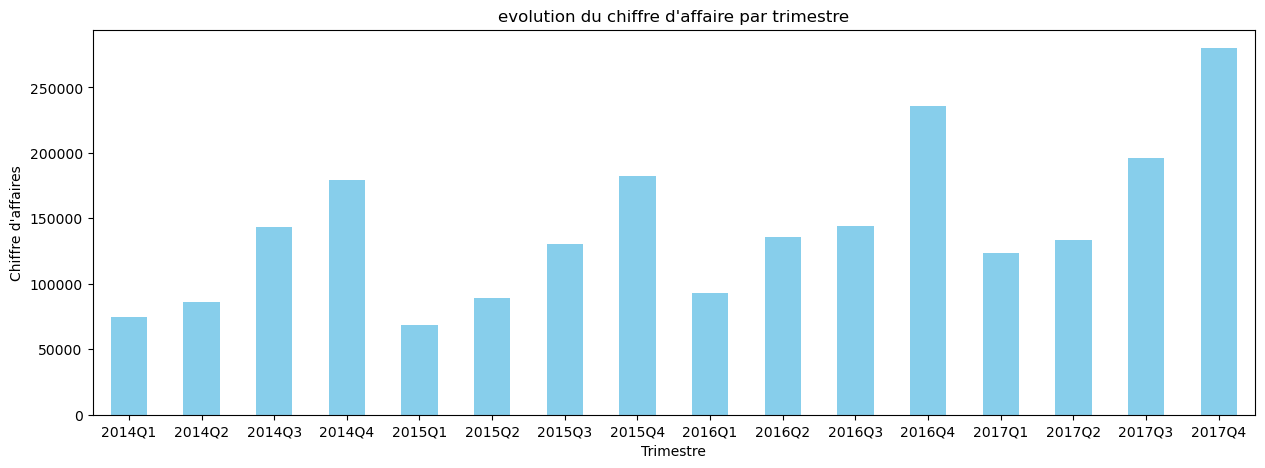

In [150]:
# representation des ventes par trimestre
sales_quarter = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()

sales_quarter.plot(kind='bar', figsize=(15 , 5), color='skyblue')
plt.title("Évolution du chiffre d'affaires par trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Chiffre d'affaires")
plt.title("evolution du chiffre d'affaire par trimestre")
plt.xticks(rotation=0)
plt.show()

###  Panier moyen ###

In [158]:
df['Year'] = df['Order Date'].dt.year
# On calcule  le montant total de chaque commande unique
order_totals = df.groupby(['Order ID', 'Year'])['Sales'].sum().reset_index()

# calcul de moy des panniers by each year
panier_moyen= order_totals.groupby('Year')['Sales'].mean()
print("mean panier :" , panier_moyen)

mean panier : Year
2014    499.449047
2015    453.306849
2016    463.274219
2017    434.626707
Name: Sales, dtype: float64


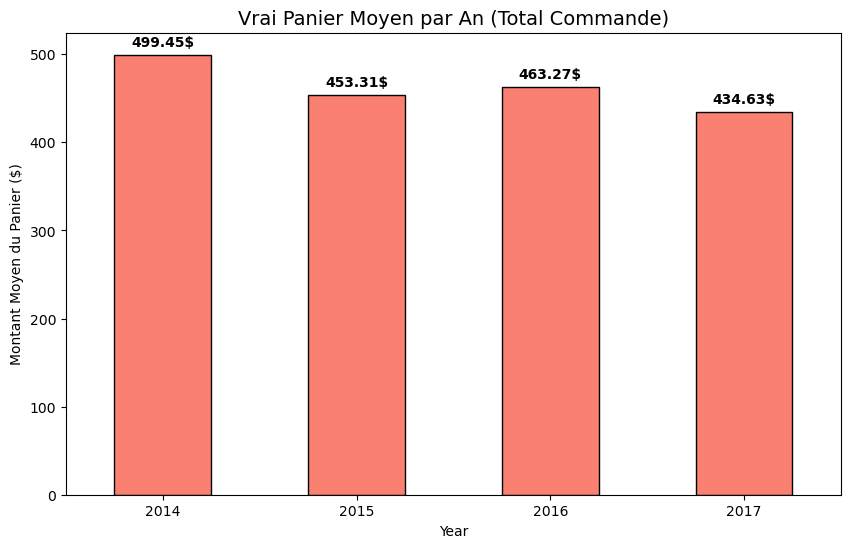

In [159]:

plt.figure(figsize=(10, 6))
ax = panier_moyen.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Vrai Panier Moyen par An (Total Commande)', fontsize=14)
plt.ylabel('Montant Moyen du Panier ($)')
plt.xticks(rotation=0)

# Ajout des étiquettes
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}$", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), 
                textcoords='offset points', fontweight='bold')

plt.show()

In [160]:
# Total dépensé par client chaque jour (panier moyen par client par jour)
daily_totals = df.groupby(['Customer ID', df['Order Date'].dt.date])['Sales'].sum().reset_index()
daily_totals.rename(columns={'Sales': 'TotalAmount'}, inplace=True)
print(daily_totals.head())


  Customer ID  Order Date  TotalAmount
0    AA-10315  2014-03-31      726.548
1    AA-10315  2014-09-15       29.500
2    AA-10315  2015-10-04       26.960
3    AA-10315  2016-03-03     4406.072
4    AA-10315  2017-06-29      374.480


### nombre de transactions ###

In [161]:
transactions = df['Order ID'].nunique()
print('nombre de transactions :' ,transactions )

nombre de transactions : 5009


# Analyse client #

### nbr des client actif ###

In [163]:

active_customers = df['Customer ID'].nunique()


### Fidélité client ###

In [164]:
#calcule du nombre de commandes par client
df.groupby('Customer ID')['Order ID'].nunique()



Customer ID
AA-10315     5
AA-10375     9
AA-10480     4
AA-10645     6
AB-10015     3
            ..
XP-21865    11
YC-21895     5
YS-21880     8
ZC-21910    13
ZD-21925     5
Name: Order ID, Length: 793, dtype: int64

### Analyse RFM (Recency, Frequency,Monetary) ###

#### calcul des scores R, F et M, ####

In [165]:

import datetime
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)  # notre reference c'est last date du dataset(tout les cloents sont comparer a cette dateà)

# Grouper par client
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency #la derniere date ou le customer a fait une comande
    'Order ID': 'nunique',                                   # Frequency #nbr de commande 
    'Sales': 'sum'                                           # Monetary #total sum des achats
}).reset_index()

rfm.rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)

rfm.head()



,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,56,6,5086.935
4,AB-10015,416,3,886.156


In [166]:
# je strandarise les Scores 
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

# calcule du score finale du RFM
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()



,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,1,1,3,113
3,AA-10645,56,6,5086.935,3,3,5,335
4,AB-10015,416,3,886.156,1,1,1,111


#### segmentation des clients selon leur comportement. ####

In [167]:
def rfm_segment(row):
    r = int(row['R_Score'])
    f = int(row['F_Score'])
    m = int(row['M_Score'])

    if r >= 4 and f >= 4 and m >= 4:
        return 'extra fidèle'
    elif r >= 4 and f >= 3:
        return 'fidèle'
    elif r <= 2:
        return 'pas ouf'
    else:
        return 'autre'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)
rfm['Segment'].value_counts()


Segment
pas ouf         316
autre           248
fidèle          123
extra fidèle    106
Name: count, dtype: int64

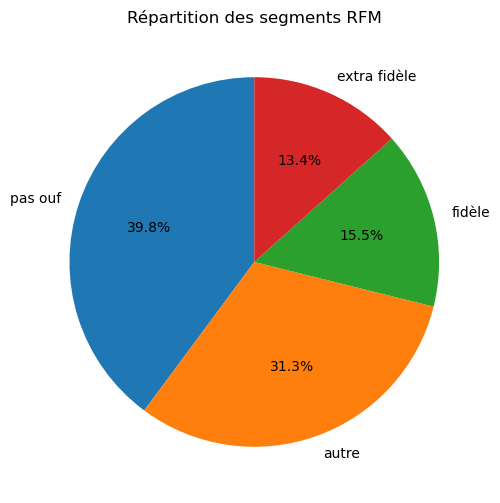

In [168]:

# compter le nombre de clients par segment
segment_counts = rfm['Segment'].value_counts()

# pie chart
plt.figure(figsize=(6,6))
plt.pie(
    segment_counts,
    labels=segment_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Répartition des segments RFM")
plt.show()


# 3.3- Analyse produit #

### Identification des produits stars ###

In [169]:
top_produits = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_produits)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


# Identification des produits morts ou peu performants  #

In [170]:
flop_produits = df.groupby('Product Name')['Sales'].sum().sort_values().head(10)
print(flop_produits)

Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac    1.624
Avery 5                                                             5.760
Xerox 20                                                            6.480
Grip Seal Envelopes                                                 7.072
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                  7.700
Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink     7.800
Xerox 1989                                                          7.968
4009 Highlighters                                                   8.040
Stockwell Gold Paper Clips                                          8.096
Newell 308                                                          8.400
Name: Sales, dtype: float64


In [171]:
nb_produits = df['Product Name'].nunique()
print("Nombre de produits :", nb_produits)


Nombre de produits : 1850


### Contribution des produits au chiffre d’affaires ### 

In [175]:
df.groupby('Product Name')['Sales'].sum() / total_sales * 100


Product Name
"While you Were Out" Message Book, One Form per Page                                                   0.001098
#10 Gummed Flap White Envelopes, 100/Box                                                               0.001798
#10 Self-Seal White Envelopes                                                                          0.004732
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             0.021285
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                0.012481
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    0.020796
iOttie HLCRIO102 Car Mount                                                                             0.009399
iOttie XL Car Mount                                                                        

### une petite visualisation ###


import plotly.express as px
#tous les produits 
contrib_produits = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)



# Somme des autres produits
autres = pd.Series({'Autres': contrib_produits[10:].sum()})

# Concaténer Top10 + Autres

data = pd.concat([top_produits, autres])
# Graphique camembert
fig = px.pie(data, names=data.index, values=data.values, title='Contribution des produits au CA')
fig.show()





# 2. Séparer le Top 10 et le reste
top10 = contrib_produits.head(10)
reste_somme = contrib_produits.iloc[10:].sum()

# 3. Créer un nouveau DataFrame propre (c'est plus sûr pour Plotly)
data = pd.DataFrame({
    'Produit': list(top10.index) + ['Autres'],
    'Ventes': list(top10.values) + [reste_somme]
})

# 4. Graphique camembert
fig = px.pie(data, 
             names='Produit', 
             values='Ventes', 
             title='Contribution des produits au CA',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()


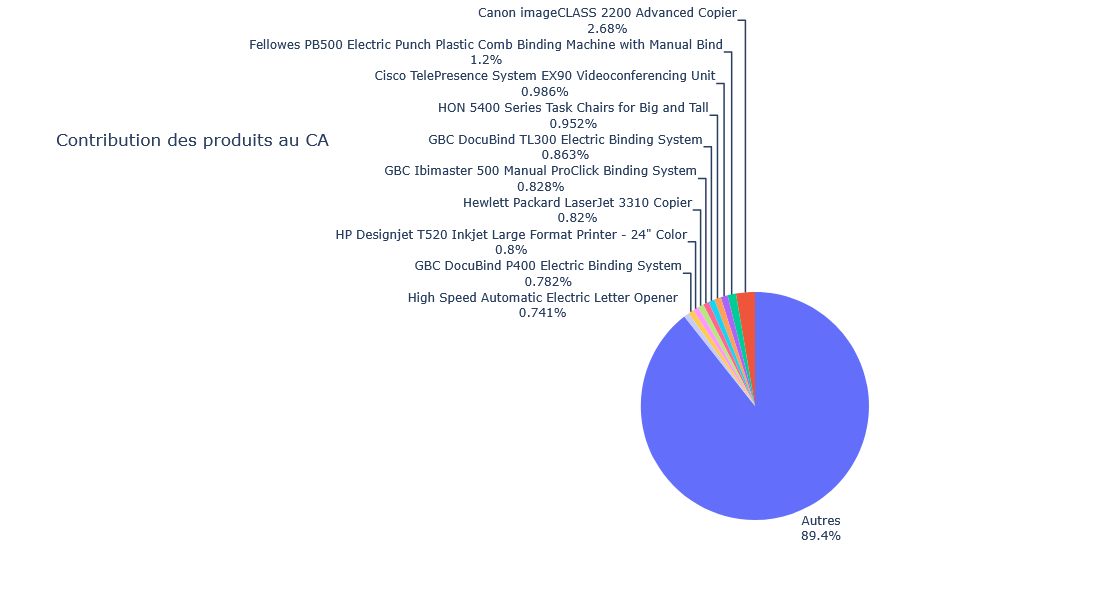

In [ ]:
import plotly.express as px


# tous les produits 
contrib_produits = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Somme des autres produits
autres = pd.Series({'Autres': contrib_produits[10:].sum()})

# Concaténer Top10 + Autres

 
data = pd.concat([top_produits, autres])


fig = px.pie(data, 
             names=data.index, 
             values=data.values, 
             title='Contribution des produits au CA',
             width=900,  
             height=600,
             template="plotly_white")
ig.update_traces(textposition='outside', textinfo='percent+label')


fig.update_layout(showlegend=False) 

fig.show()

# 3.4 Analyse temporelle #

### Saisonnalité des ventes (mois, semaines,jours) ###

### preparation ###

In [180]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# je l'est deja fait j'ai juste oublier
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df['Date'] = df['Order Date'].dt.date
df['DayName'] = df['Order Date'].dt.day_name()


### chiffre d'affaire par année ###

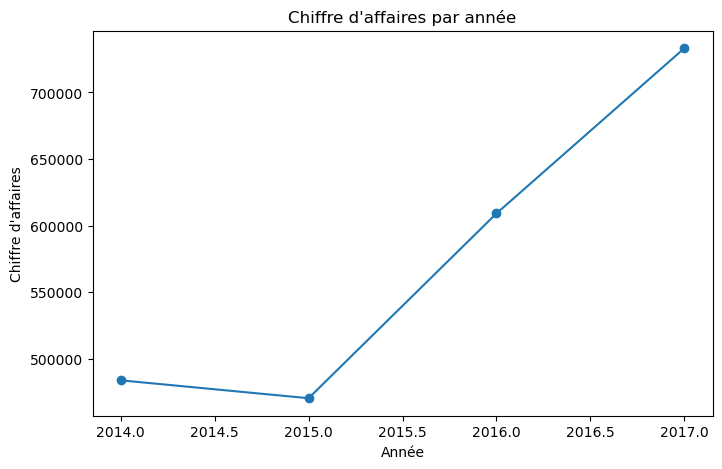

In [181]:
ca_annee = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(8,5))
ca_annee.plot(marker='o')
plt.title("Chiffre d'affaires par année")
plt.xlabel("Année")
plt.ylabel("Chiffre d'affaires")
plt.show()


### chiffre d'affaire par mois ###

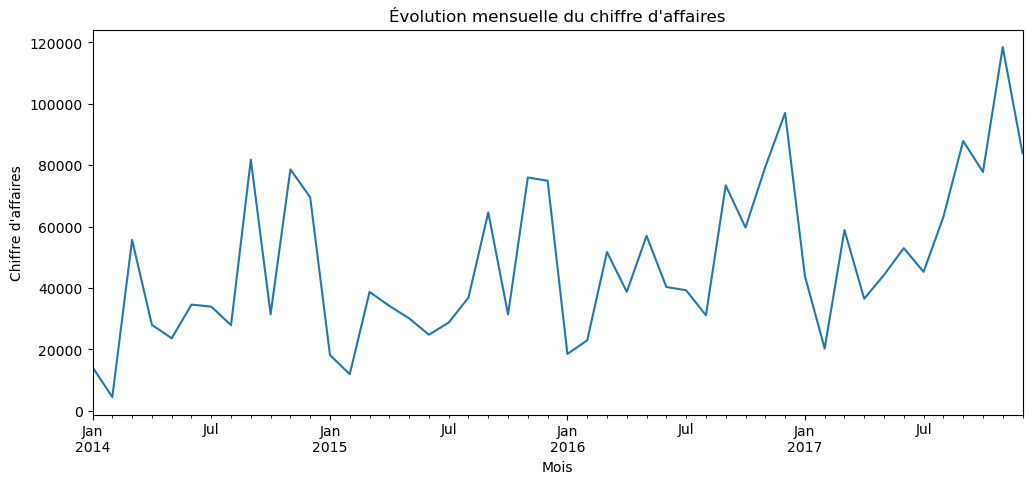

In [182]:
ca_mensuel = df.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(12,5))
ca_mensuel.plot()
plt.title("Évolution mensuelle du chiffre d'affaires")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires")
plt.show()


### chiffre d'affaire par mois en moyenne ###

C:\Users\dell\AppData\Local\Temp\ipykernel_40940\357123969.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




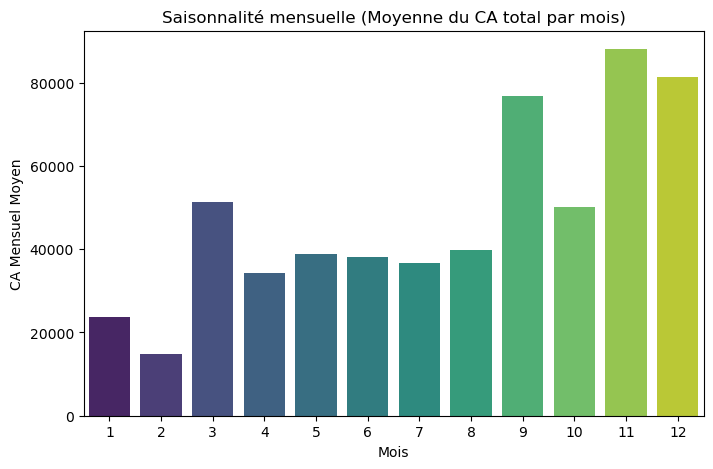

In [183]:
# calcule  total des ventes pour chaque mois de chaque année
ca_mensuel_total = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

#  moyenne de ces totaux pour saisonnalité réelle
saisonnalite_reelle = ca_mensuel_total.groupby('Month')['Sales'].mean()


plt.figure(figsize=(8,5))
sns.barplot(x=saisonnalite_reelle.index, y=saisonnalite_reelle.values, palette="viridis")
plt.title("Saisonnalité mensuelle (Moyenne du CA total par mois)")
plt.xlabel("Mois")
plt.ylabel("CA Mensuel Moyen")
plt.show()

### chiffre d'affaire par jours ###

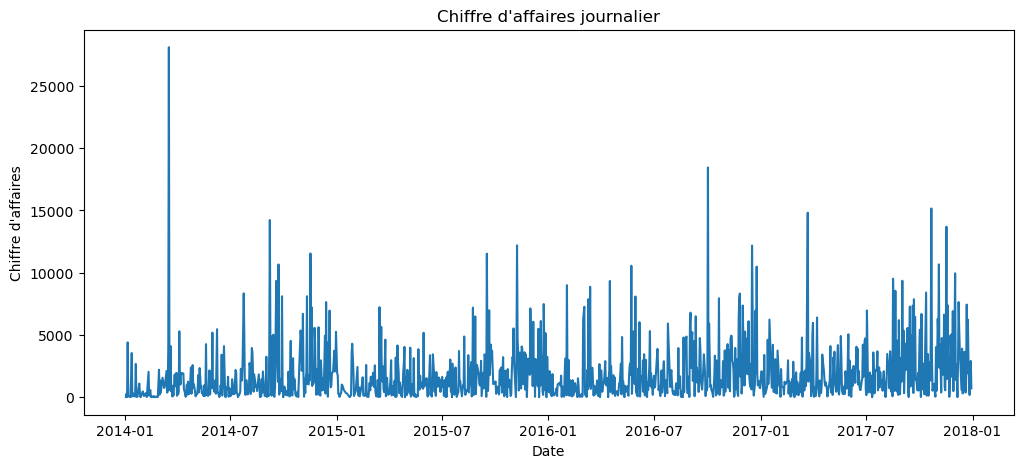

In [184]:
ca_journalier = df.groupby('Date')['Sales'].sum()

plt.figure(figsize=(12,5))
plt.plot(ca_journalier.index, ca_journalier.values)
plt.title("Chiffre d'affaires journalier")
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.show()


### chiffre d'affaire par journné de la semaine en moyenne ###

C:\Users\dell\AppData\Local\Temp\ipykernel_40940\2652945816.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




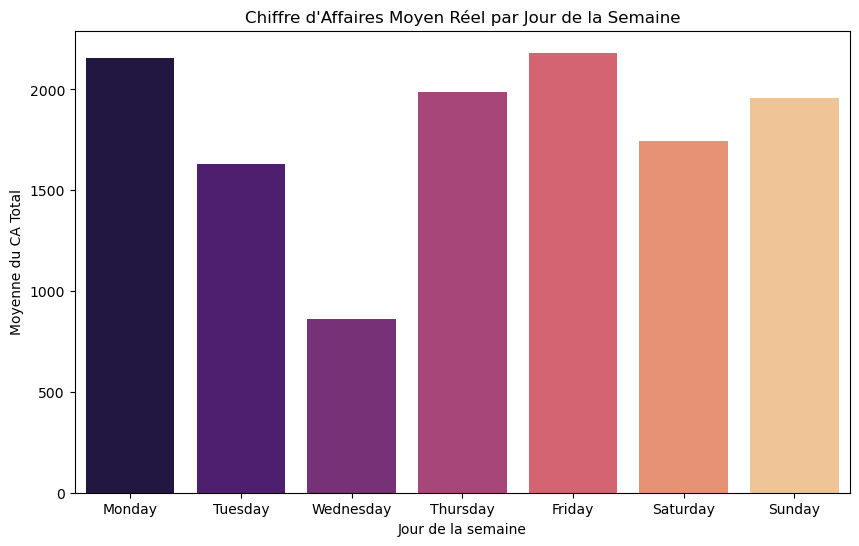

In [185]:
#  Calcule le CA total pour chaque date unique 
ca_par_date = df.groupby(['Date', 'DayName'])['Sales'].sum().reset_index()

#  Calcule la moyenne de ces totaux pour chaque jour de la semaine
ordre_jours = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ca_jour_semaine = ca_par_date.groupby('DayName')['Sales'].mean().reindex(ordre_jours)


plt.figure(figsize=(10,6))
sns.barplot(x=ca_jour_semaine.index, y=ca_jour_semaine.values, palette="magma")
plt.title("Chiffre d'Affaires Moyen Réel par Jour de la Semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Moyenne du CA Total")
plt.show()

### Détection de périodes de forte et faible activité  ###

In [186]:
# On repart de ton CA mensuel total
ca_mensuel = df.groupby('YearMonth')['Sales'].sum().reset_index()

# Calcul de la moyenne et de l'écart-type
moyenne = ca_mensuel['Sales'].mean()
ecart_type = ca_mensuel['Sales'].std()

# Définition des seuils (1.5 fois l'écart-type est une mesure standard)
seuil_haut = moyenne + 1.5 * ecart_type
seuil_bas = moyenne - 1.5 * ecart_type

# Identification
pics = ca_mensuel[ca_mensuel['Sales'] > seuil_haut]
creux = ca_mensuel[ca_mensuel['Sales'] < seuil_bas]

print(f"Mois de forte activité : \n{pics}")
print(f"Mois de faible activité : \n{creux}")

Mois de forte activité : 
   YearMonth       Sales
35   2016-12   96999.043
44   2017-09   87866.652
46   2017-11  118447.825
Mois de faible activité : 
  YearMonth     Sales
1   2014-02  4519.892


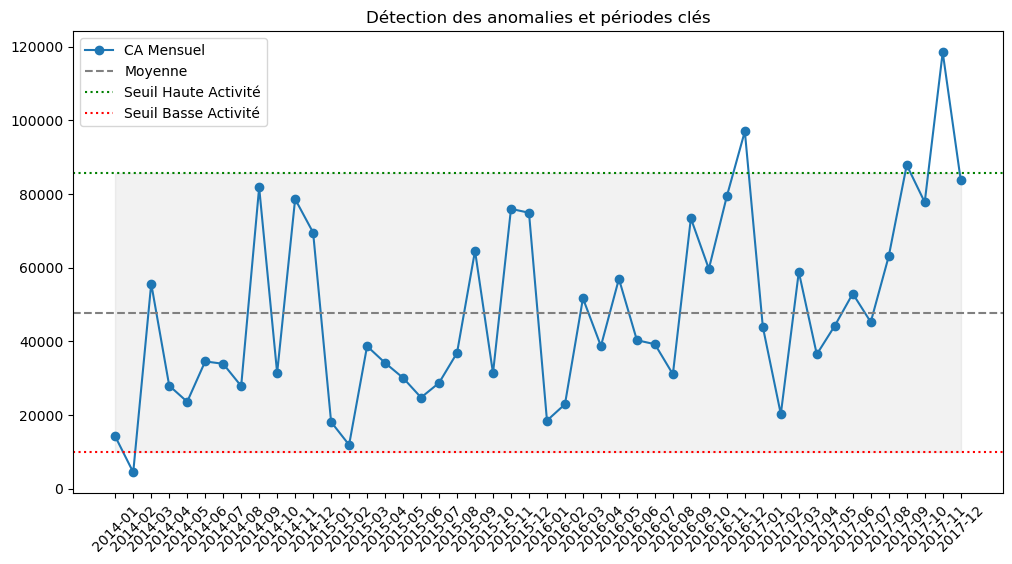

In [187]:
plt.figure(figsize=(12,6))
plt.plot(ca_mensuel['YearMonth'].astype(str), ca_mensuel['Sales'], marker='o', label='CA Mensuel')


plt.axhline(y=moyenne, color='gray', linestyle='--', label='Moyenne')
plt.axhline(y=seuil_haut, color='green', linestyle=':', label='Seuil Haute Activité')
plt.axhline(y=seuil_bas, color='red', linestyle=':', label='Seuil Basse Activité')

plt.fill_between(ca_mensuel['YearMonth'].astype(str), seuil_bas, seuil_haut, color='gray', alpha=0.1)

plt.xticks(rotation=45)
plt.title("Détection des anomalies et périodes clés")
plt.legend()
plt.show()